In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
import time
from datetime import datetime
from numpy.random import seed
seed(1) # Fixing random seed for reproducibility

Loading Data and Image Processing

In [ ]:
# dimensions of our images
img_width, img_height = 500, 500

# Relative directory paths
from google.colab import drive
drive.mount('/content/gdrive')
train_data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/train'
validation_data_dir = '/content/gdrive/MyDrive/Colab Notebooks/Data/valid'

#Check for image format
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

#Rescale all images for training & Apply data augmentation for better training performance
train_datagen = ImageDataGenerator(
    # horizontal_flip=True,
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2)

#Rescale my images for voldiation. Data augementation should not be applied to validation dataset
test_datagen = ImageDataGenerator(rescale=1. / 255)

batch_size = 32
#Generate the scaling and data augmentation to the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

#Generate the scaling to the test dataset
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 1942 images belonging to 3 classes.
Found 431 images belonging to 3 classes.


Model Architecture

In [ ]:
#Develop the CNN Architecture

model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))

model.add(Dense(3, activation='softmax'))


In [ ]:
#Compile model with loss function, optimizer, and target metrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model Training

In [ ]:
#Training & Validation dataset sizes
nb_train_samples = 300
nb_validation_samples = 300

#Model hyperparameter
epochs = 20

#Attain summary of the model
model.summary()

#Training the Neural Network Architecture (Need to define the "model" when creating the architecture)
history = model.fit(
          train_generator, #Uses the augmented train data generated
          steps_per_epoch = nb_train_samples // batch_size, #Training steps taken per epoch
          epochs = epochs, #Total number of epochs defined
          validation_data = validation_generator, #Uses the scaled validation data
          validation_steps = nb_validation_samples // batch_size) #Validation steps taken per epoch


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 256)         │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,917,187 (30.20 MB)

 Trainable params: 7,917,187 (30.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.2850 - loss: 1.1904 - val_accuracy: 0.5139 - val_loss: 1.0875
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 70s 8s/step - accuracy: 0.4127 - loss: 1.0915 - val_accuracy: 0.4755 - val_loss: 1.0061
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.4887 - loss: 0.9885 - val_accuracy: 0.6632 - val_loss: 0.8300
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.6900 - loss: 0.8010 - val_accuracy: 0.5385 - val_loss: 0.8199
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 47s 5s/step - accuracy: 0.5432 - loss: 0.9681 - val_accuracy: 0.7049 - val_loss: 0.6916
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.7529 - loss: 0.6619 - val_accuracy: 0.6573 - val_loss: 0.7423
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.6814 - loss: 0.7409 - val_accuracy: 0.6701 - val_loss: 0.7117
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 131s 10s/step - accuracy: 0.6657 - loss: 0.6943 - val_accuracy: 0.6853 - val_loss: 0.6683
Epoch 

In [ ]:
#Save model (Saves Architecture and Weights)
model.save('/content/gdrive/MyDrive/Colab Notebooks/Data/saved_trained_models/trained_model_{0}.h5'.format(datetime.today().strftime("%Y-%m-%d")))

Plotting Performance: Accuracy and Loss of Trainning and Validation

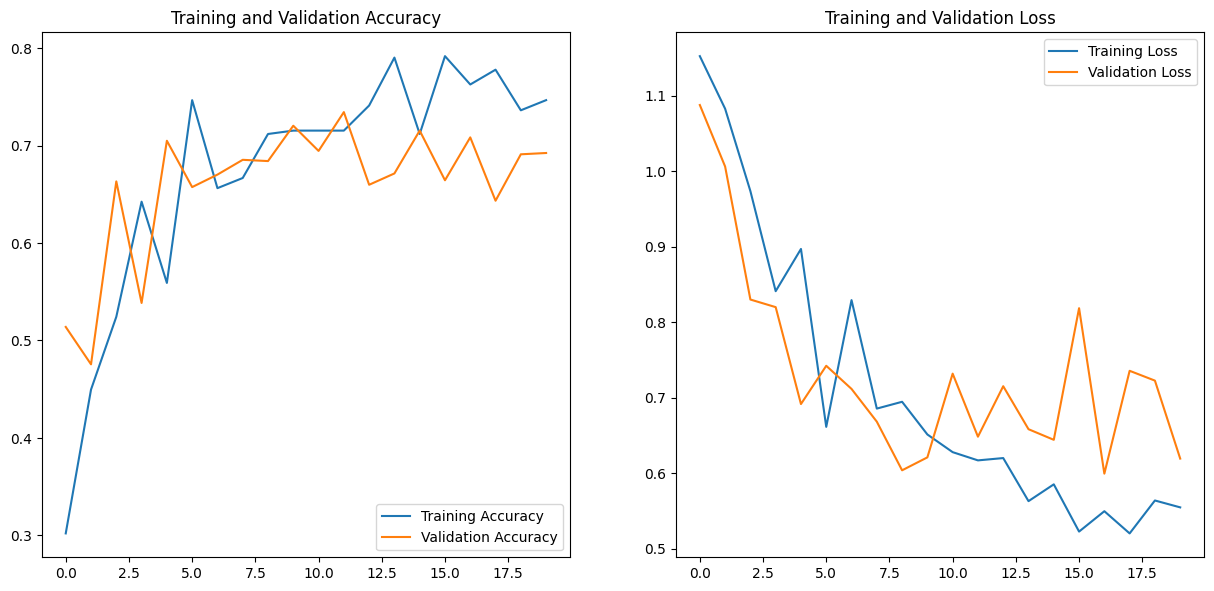

In [ ]:
#Extract the accuracy and loss for both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()